In [1]:
import pandas as pd

In [2]:
guide_train=pd.read_csv("GUIDE_Train.csv")
guide_test=pd.read_csv("GUIDE_Test.csv")

C:\Users\Rekha\AppData\Local\Temp\ipykernel_27660\4108339856.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  guide_test=pd.read_csv("GUIDE_Test.csv")


In [3]:
#Data preprocessing for train dataset
guide_train.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [4]:
guide_train.shape

(9516837, 45)

In [5]:
guide_train.isna().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName                    0
FolderPath

In [6]:
missing_percentage=guide_train.isnull().sum() / guide_train.shape[0] * 100.00

In [7]:
columns_to_drop = missing_percentage[missing_percentage > 50].index
columns_to_drop


Index(['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')

In [8]:
guide_train.drop(columns=columns_to_drop, inplace=True)

In [9]:
guide_train.dropna(subset=["IncidentGrade"], inplace=True)

In [10]:
guide_train.isna().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

In [11]:
guide_train.duplicated().sum()

np.int64(542692)

In [12]:
guide_train.drop_duplicates(inplace=True)

In [13]:
guide_train.duplicated().sum()

np.int64(0)

In [14]:
guide_train.select_dtypes(include='number').nunique()  # here osfamily, osversion shows very low values, it comes under categorical 

Id                     707108
OrgId                    5340
IncidentId             448901
AlertId               1248789
DetectorId               7813
AlertTitle              79952
DeviceId                75557
Sha256                 106416
IpAddress              285957
Url                    123252
AccountSid             353113
AccountUpn             524760
AccountObjectId        338252
AccountName            363254
DeviceName             114267
NetworkMessageId       375196
RegistryKey              1341
RegistryValueName         525
RegistryValueData         699
ApplicationId            1728
ApplicationName          2681
OAuthApplicationId        703
FileName               222085
FolderPath              87832
ResourceIdName           2283
OSFamily                    6
OSVersion                  58
CountryCode               236
State                    1368
City                     9342
dtype: int64

In [15]:
uniques = guide_train.select_dtypes(exclude='number').nunique()

In [16]:
uniques

Timestamp        755654
Category             20
IncidentGrade         3
EntityType           33
EvidenceRole          2
dtype: int64

In [17]:
#Feature Engineering
guide_train['Timestamp'] = pd.to_datetime(guide_train['Timestamp'], errors='coerce')
guide_train['Hour_of_Day']=guide_train['Timestamp'].dt.hour
guide_train['Day_of_Week']=guide_train['Timestamp'].dt.dayofweek

guide_train.drop(columns=['Timestamp'],inplace=True)

In [18]:
#view total no of columns and dtypes

print('total number of features: %d\n'%(guide_train.shape[1]))
guide_train.dtypes

total number of features: 36



Id                     int64
OrgId                  int64
IncidentId             int64
AlertId                int64
DetectorId             int64
AlertTitle             int64
Category              object
IncidentGrade         object
EntityType            object
EvidenceRole          object
DeviceId               int64
Sha256                 int64
IpAddress              int64
Url                    int64
AccountSid             int64
AccountUpn             int64
AccountObjectId        int64
AccountName            int64
DeviceName             int64
NetworkMessageId       int64
RegistryKey            int64
RegistryValueName      int64
RegistryValueData      int64
ApplicationId          int64
ApplicationName        int64
OAuthApplicationId     int64
FileName               int64
FolderPath             int64
ResourceIdName         int64
OSFamily               int64
OSVersion              int64
CountryCode            int64
State                  int64
City                   int64
Hour_of_Day   

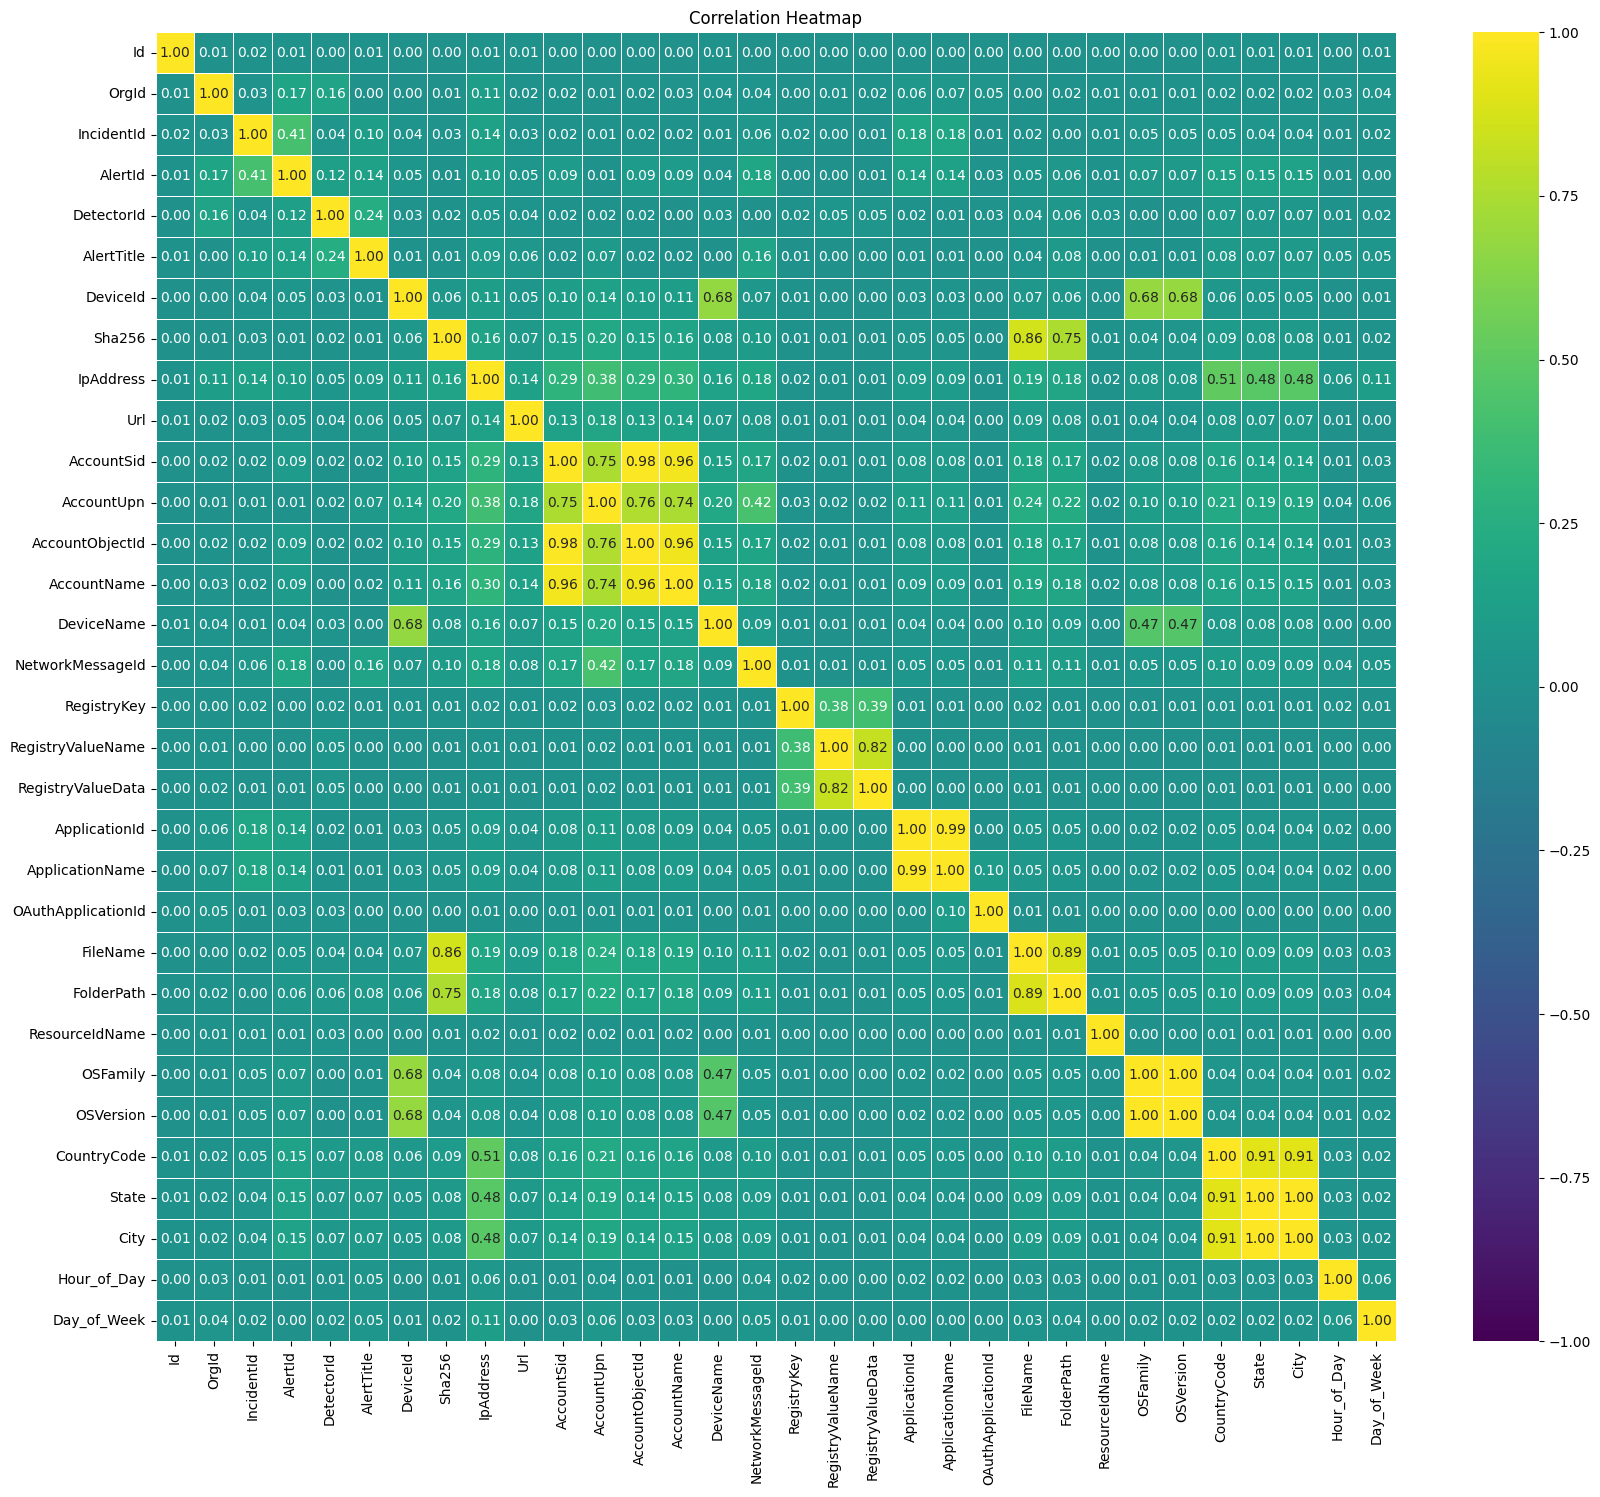

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_df = guide_train.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr().abs()

plt.figure(figsize=(20,17))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [21]:
corr_features = correlation(numerical_df, 0.8)
len(set(corr_features))

9

In [22]:
corr_features

{'AccountName',
 'AccountObjectId',
 'ApplicationName',
 'City',
 'FileName',
 'FolderPath',
 'OSVersion',
 'RegistryValueData',
 'State'}

In [23]:
guide_train.drop(corr_features, axis=1, inplace=True)

In [24]:
guide_train.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'DeviceName',
       'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 'ApplicationId',
       'OAuthApplicationId', 'ResourceIdName', 'OSFamily', 'CountryCode',
       'Hour_of_Day', 'Day_of_Week'],
      dtype='object')

In [25]:
print(guide_train.select_dtypes(include='object'))

                  Category   IncidentGrade         EntityType EvidenceRole
0            InitialAccess    TruePositive                 Ip      Related
1             Exfiltration   FalsePositive               User     Impacted
2            InitialAccess   FalsePositive                Url      Related
3        CommandAndControl  BenignPositive                Url      Related
4                Execution    TruePositive               User     Impacted
...                    ...             ...                ...          ...
9516832      InitialAccess    TruePositive  CloudLogonRequest      Related
9516833  CommandAndControl  BenignPositive                Url      Related
9516834       Exfiltration  BenignPositive        MailMessage     Impacted
9516835             Impact  BenignPositive                 Ip      Related
9516836       Exfiltration  BenignPositive        MailMessage     Impacted

[8922805 rows x 4 columns]


In [26]:
#encoding
from sklearn.preprocessing import LabelEncoder
column_to_encode=guide_train.select_dtypes(include='object')
label_encoder=LabelEncoder()
for col in column_to_encode:
    guide_train[col] = label_encoder.fit_transform(guide_train[col])

In [27]:
guide_train.head(4)

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,NetworkMessageId,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Hour_of_Day,Day_of_Week
0,180388628218,0,612,123247,7,6,10,2,15,1,...,529644,1631,635,2251,881,3586,5,31,6,1
1,455266534868,88,326,210035,58,43,7,1,32,0,...,529644,1631,635,2251,881,3586,5,242,3,4
2,1056561957389,809,58352,712507,423,298,10,1,31,1,...,529644,1631,635,2251,881,3586,5,242,4,3
3,1279900258736,92,32992,774301,2,2,1,0,31,1,...,529644,1631,635,2251,881,3586,5,242,16,0


In [28]:
guide_test.shape

(4147992, 46)

In [29]:
guide_test.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [30]:
#test data additional column 'Usage' so i delete the column

guide_test = guide_test.drop('Usage', axis=1)

In [31]:
#find duplicates

guide_test.duplicated().sum()

np.int64(104)

In [32]:
#drop duplicates
guide_test.drop_duplicates(inplace=True)

In [33]:
guide_test.duplicated().sum()

np.int64(0)

In [34]:
#missing values

guide_test.isna().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307084
IncidentGrade               0
ActionGrouped         4145975
ActionGranular        4145975
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106182
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116518
FileName                    0
FolderPath

In [35]:
missing_percentage=guide_test.isnull().sum() / guide_test.shape[0] * 100.00

In [36]:
missing_percentage

Id                     0.000000
OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       55.620692
IncidentGrade          0.000000
ActionGrouped         99.953880
ActionGranular        99.953880
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId        98.994524
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.000000
OAuthApplicationId     0.000000
ThreatFa

In [37]:
columns_to_drop = missing_percentage[missing_percentage > 50].index
columns_to_drop

Index(['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')

In [38]:
guide_test.drop(columns=columns_to_drop, inplace=True)

In [39]:
guide_test.isna().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

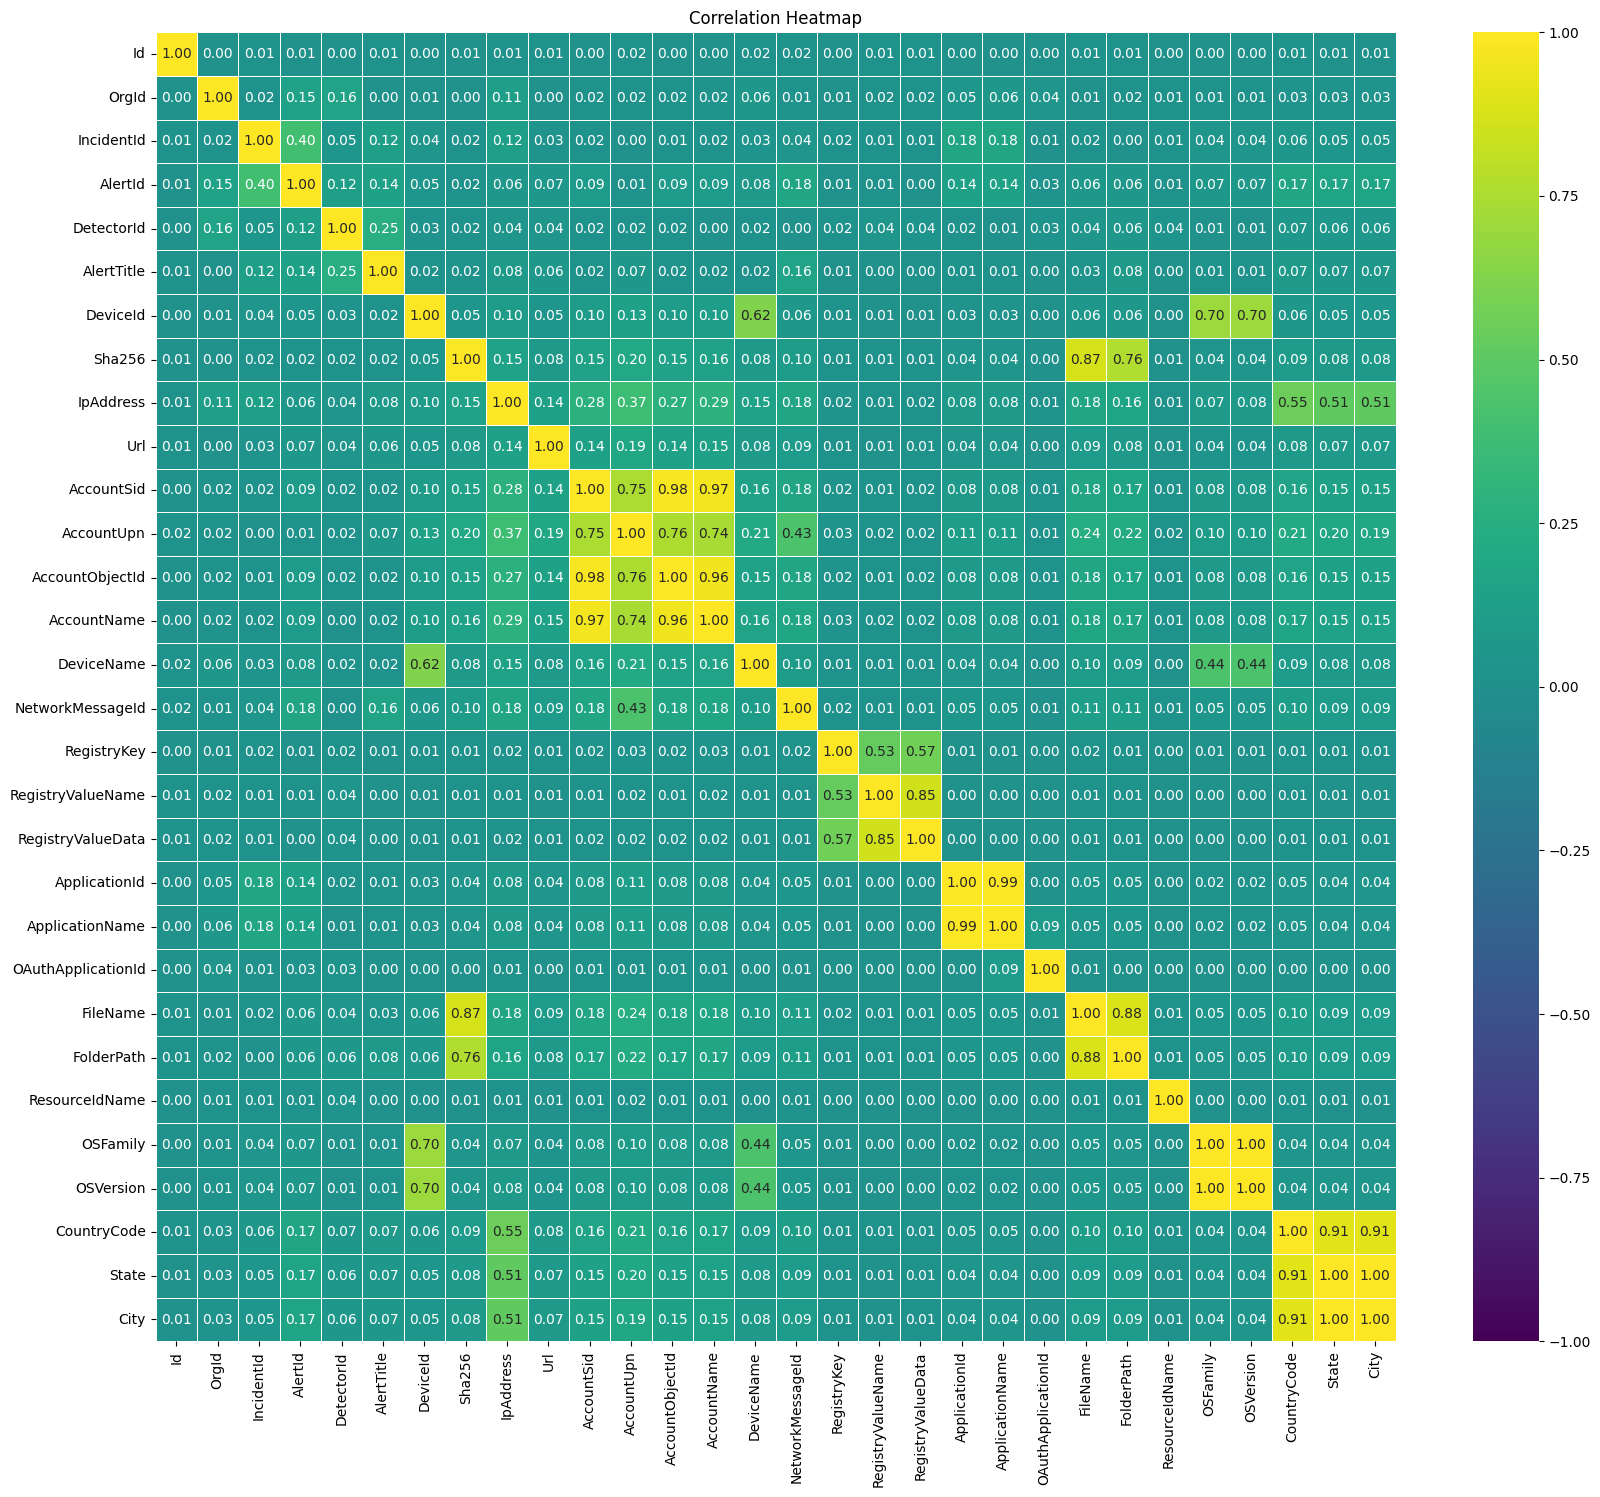

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_df = guide_test.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr().abs()

plt.figure(figsize=(20,17))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [41]:
corr_features = correlation(numerical_df, 0.8)
len(set(corr_features))

9

In [42]:
corr_features

{'AccountName',
 'AccountObjectId',
 'ApplicationName',
 'City',
 'FileName',
 'FolderPath',
 'OSVersion',
 'RegistryValueData',
 'State'}

In [43]:
guide_test.drop(corr_features, axis=1, inplace=True)

In [44]:
#Feature Engineering
guide_test['Timestamp'] = pd.to_datetime(guide_test['Timestamp'], errors='coerce')
guide_test['Hour_of_Day']=guide_test['Timestamp'].dt.hour
guide_test['Day_of_Week']=guide_test['Timestamp'].dt.dayofweek

guide_test.drop(columns=['Timestamp'],inplace=True)

In [45]:
guide_test.shape

(4147888, 27)

In [46]:
#encoding
from sklearn.preprocessing import LabelEncoder
column_to_encode=guide_test.select_dtypes(include='object')
label_encoder=LabelEncoder()
for col in column_to_encode:
    guide_test[col] = label_encoder.fit_transform(guide_test[col])

In [47]:
#done preprocessing both datasets, next train the model

X = guide_train.drop(columns=['IncidentGrade'])
y = guide_train['IncidentGrade']

In [48]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('training data: %d\n test data: %d' % (X_train.shape[0], X_test.shape[0]))

training data: 7138244
 test data: 1784561


In [49]:
#Train the model 

#Logistic regression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_prediction=logistic_model.predict(X_test)

# Evaluate the model

accuracy = accuracy_score(y_test, logistic_prediction)
classification_rep = classification_report(y_test, logistic_prediction)

#Confusion matrix

logistic_cm=confusion_matrix(y_test, logistic_prediction)
print("Accuracy:\n", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion_Matrix:\n", logistic_cm)

c:\Users\Rekha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rekha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rekha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Accuracy:
 0.4296121006791026
Classification Report:
               precision    recall  f1-score   support

           0       0.43      1.00      0.60    766672
           1       0.00      0.00      0.00    391508
           2       0.00      0.00      0.00    626381

    accuracy                           0.43   1784561
   macro avg       0.14      0.33      0.20   1784561
weighted avg       0.18      0.43      0.26   1784561

Confusion_Matrix:
 [[766669      0      3]
 [391508      0      0]
 [626381      0      0]]


In [50]:
#Random forest classifier

from sklearn.ensemble import RandomForestClassifier
randomforest_model=RandomForestClassifier(n_estimators=50,        
    max_depth=10,           
    max_features='sqrt',    
    n_jobs=-1,              
    random_state=42)
randomforest_model.fit(X_train, y_train)
randomforest_prediction=randomforest_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, randomforest_prediction)
classification_rep = classification_report(y_test, randomforest_prediction)
#Cofusion matrix
randomforest_cm=confusion_matrix(y_test, randomforest_prediction)
print("Accuracy: {:.2f}".format(accuracy))
print("Classification Report:\n", classification_rep)
print("Confusion_Matrix:\n", randomforest_cm)


Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.98      0.80    766672
           1       0.94      0.53      0.68    391508
           2       0.97      0.72      0.82    626381

    accuracy                           0.79   1784561
   macro avg       0.86      0.74      0.77   1784561
weighted avg       0.84      0.79      0.78   1784561

Confusion_Matrix:
 [[750816   8364   7492]
 [177156 207805   6547]
 [173541   4759 448081]]


In [51]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)
decision_tree_model = decision_tree_model.fit(X_train,y_train)
decision_tree_prediction = decision_tree_model.predict(X_test)
                                                      
#Evaluate model
                                                       
accuracy = accuracy_score(y_test, decision_tree_prediction)
classification_rep = classification_report(y_test, decision_tree_prediction)

#Confusion matrix

decision_tree_cm=confusion_matrix(y_test, decision_tree_prediction)
print("Accuracy: {:.2f}".format(accuracy))
print("Classification Report:\n", classification_rep)
print("Confusion_Matrix:\n", decision_tree_cm)


Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.93      0.80    766672
           1       0.85      0.60      0.71    391508
           2       0.93      0.73      0.82    626381

    accuracy                           0.79   1784561
   macro avg       0.83      0.76      0.78   1784561
weighted avg       0.82      0.79      0.79   1784561

Confusion_Matrix:
 [[713332  29123  24217]
 [146260 236059   9189]
 [155925  11917 458539]]


In [52]:
#xgboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100, 
    max_depth=5,        
    learning_rate=0.1,  
    subsample=0.8,      
    colsample_bytree=0.8, 
    n_jobs=-1 )
xgb_model.fit(X_train, y_train)
xgb_prediction=xgb_model.predict(X_test)
#Accuracy
accuracy = accuracy_score(y_test, xgb_prediction)
classification_rep = classification_report(y_test, xgb_prediction)
#Confusion matrix
xgb_cm=confusion_matrix(y_test, xgb_prediction)
print("Accuracy: {:.2f}".format(accuracy))
print("Classification Report:\n", classification_rep)
print("Confusion_Matrix:\n", xgb_cm)

Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.96      0.85    766672
           1       0.91      0.68      0.77    391508
           2       0.95      0.80      0.87    626381

    accuracy                           0.84   1784561
   macro avg       0.87      0.81      0.83   1784561
weighted avg       0.86      0.84      0.84   1784561

Confusion_Matrix:
 [[738554  16211  11907]
 [111702 264372  15434]
 [112977  11397 502007]]


In [53]:
#Best model

import joblib

joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [54]:
X_g_test = guide_test.drop(columns=['IncidentGrade'])
y_g_test = guide_test['IncidentGrade']

In [55]:
import joblib
loaded_model_xgb = joblib.load('xgb_model.pkl')
y_pred_best_model = loaded_model_xgb.predict(X_g_test)

accuracy = accuracy_score(y_g_test, y_pred_best_model)
classification_rep = classification_report(y_g_test, y_pred_best_model)
#Confusion matrix
best_model_xgb=confusion_matrix(y_g_test, y_pred_best_model)
print("Accuracy: {:.2f}".format(accuracy))
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", best_model_xgb)

Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.83   1752895
           1       0.86      0.66      0.75    902664
           2       0.93      0.79      0.85   1492329

    accuracy                           0.82   4147888
   macro avg       0.85      0.80      0.81   4147888
weighted avg       0.84      0.82      0.82   4147888

Confusion Matrix:
 [[1643687   64510   44698]
 [ 259226  595439   47999]
 [ 284098   29088 1179143]]


Model Evaluation Output
Macro-F1 Score: 0.81
Precision:
True Positive (TP): 0.75
Benign Positive (BP): 0.86
False Positive (FP): 0.93
Recall:
True Positive (TP): 0.94
Benign Positive (BP): 0.66
False Positive (FP): 0.79
F1-Score:
True Positive (TP): 0.83
Benign Positive (BP): 0.75
False Positive (FP): 0.85
Accuracy: 0.82
-----------
Model Predictions (on Randomly Selected Test Incidents)
Predicted Class for Incident #2328719: TruePositive
Predicted Class for Incident #4032804: TruePositive
Predicted Class for Incident #2866094: TruePositive
Predicted Class for Incident #4064282: FalsePositive
Predicted Class for Incident #1085414: TruePositive
Feature Importance (from model)
Feature 2 (OrgId) Importance: 0.11
Feature 5 (DetectorId) Importance: 0.10
Feature 24 (CountryCode) Importance: 0.08
Feature 11 (Sha256) Importance: 0.07
Feature 3 (IncidentId) Importance: 0.07


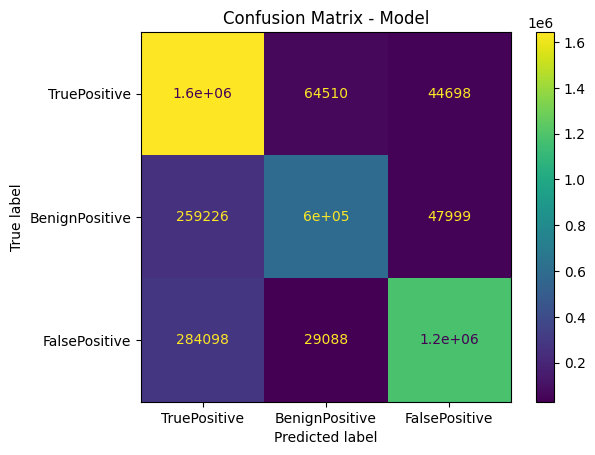

In [56]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

report = classification_report(y_g_test, y_pred_best_model, target_names=["TruePositive", "BenignPositive", "FalsePositive"], output_dict=True)

precision_tp = report["TruePositive"]["precision"]
recall_tp = report["TruePositive"]["recall"]
f1_tp = report["TruePositive"]["f1-score"]

precision_bp = report["BenignPositive"]["precision"]
recall_bp = report["BenignPositive"]["recall"]
f1_bp = report["BenignPositive"]["f1-score"]

precision_fp = report["FalsePositive"]["precision"]
recall_fp = report["FalsePositive"]["recall"]
f1_fp = report["FalsePositive"]["f1-score"]


macro_f1 = report["macro avg"]["f1-score"]

print("Model Evaluation Output")
print(f"Macro-F1 Score: {macro_f1:.2f}")
print("Precision:")
print(f"True Positive (TP): {precision_tp:.2f}")
print(f"Benign Positive (BP): {precision_bp:.2f}")
print(f"False Positive (FP): {precision_fp:.2f}")
print("Recall:")
print(f"True Positive (TP): {recall_tp:.2f}")
print(f"Benign Positive (BP): {recall_bp:.2f}")
print(f"False Positive (FP): {recall_fp:.2f}")
print("F1-Score:")
print(f"True Positive (TP): {f1_tp:.2f}")
print(f"Benign Positive (BP): {f1_bp:.2f}")
print(f"False Positive (FP): {f1_fp:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print("-----------")


random_incidents_indices = np.random.choice(X_g_test.index, size=5, replace=False)  
test_incidents = X_g_test.loc[random_incidents_indices].index  
test_predictions = y_pred_best_model[random_incidents_indices]  

label_mapping = {0: "TruePositive", 1: "BenignPositive", 2: "FalsePositive"}

print("Model Predictions (on Randomly Selected Test Incidents)")
for incident, prediction in zip(test_incidents, test_predictions):
    print(f"Predicted Class for Incident #{incident}: {label_mapping[prediction]}")


if hasattr(xgb_model, "feature_importances_"):
    feature_importance = xgb_model.feature_importances_  

    
    print("Feature Importance (from model)")
    feature_names = X_g_test.columns  
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    
    top_5_features = importance_df.head(5)

    for i, row in top_5_features.iterrows():
        print(f"Feature {i+1} ({row['Feature']}) Importance: {row['Importance']:.2f}")
else:
    print("Model does not support feature importance extraction")


cm = confusion_matrix(y_g_test, y_pred_best_model, labels=[0, 1, 2])  

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['TruePositive', 'BenignPositive', 'FalsePositive'])
disp.plot(cmap=plt.cm.viridis)
plt.title('Confusion Matrix - Model')
plt.show()


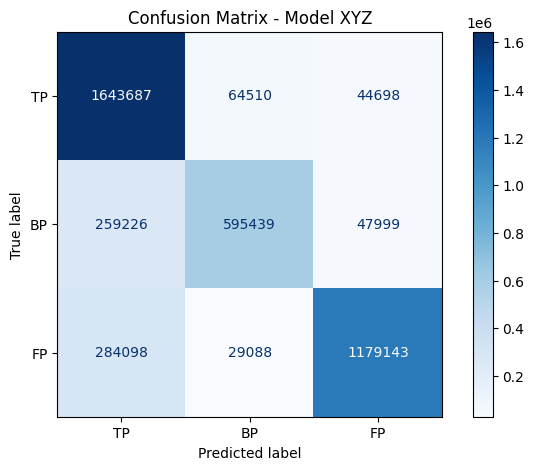

In [57]:
#confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['TP', 'BP', 'FP'])
fig, ax = plt.subplots(figsize=(8, 5))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)
plt.title('Confusion Matrix - Model XYZ')
plt.show()